In [ ]:
# Google Drive Mounting
#from google.colab import drive
import tensorflow as tf
import os
#drive.mount("/content/drive")
#datadir = 'drive/My Drive/Practical Deep Machine Learning/HW1/flower_photos'
numberOfTestPerClass = 100
OptionsResolution = [10,20,30,40,50,60]
ValidationCounter = 5
#!ls 'drive/My Drive/Practical Deep Machine Learning/HW1/flower_photos'

_URL = "http://download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

datadir = os.path.join(os.path.dirname(zip_file), 'flower_photos')
print(datadir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [ ]:
import os
def NavigateDirectory(Directory,numberOfTestPerClass):
  Folders = []
  ImageNamesTrain = []
  ImageNamesTest = []

  for file in os.listdir(Directory):    # Get Folders
    if(os.path.isdir(Directory+'/'+file)):
      Folders.append(file)

  for folder in Folders:                # Get Images
    temp=[]
    sortedtemp=[]
    for filename in os.listdir(Directory+'/'+folder):
      if filename.endswith("jpg"): temp.append(filename)
    
    sortedtemp = sorted(temp);
    ImageNamesTrain.append(sortedtemp[:-numberOfTestPerClass])
    ImageNamesTest.append(sortedtemp[-numberOfTestPerClass:])



  return Folders,ImageNamesTrain,ImageNamesTest

In [ ]:
# Get Class names from Folders & image files (jpg)
Folders, ImageNamesTrain, ImageNamesTest = NavigateDirectory(datadir,numberOfTestPerClass)
Folders = list(enumerate(Folders))
print(Folders)

[(0, 'roses'), (1, 'sunflowers'), (2, 'tulips'), (3, 'daisy'), (4, 'dandelion')]


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def Load(Directory,Folders, ImageNamesTrain,type):
  ResolutionImages = []
  ResolutionLabels = []
  
  for res in OptionsResolution:
    Images = []
    ImagesLabels = []
    for folder,listOfImages in zip(Folders,ImageNamesTrain):
      for name in listOfImages:
        image = cv2.imread(Directory+'/'+folder[1]+'/'+name)
        image = cv2.resize(image, (res,res)) # Resizing to 32x32
        image = cv2.normalize(image,  image, -1, 1, cv2.NORM_MINMAX)

        if type=="Color":
          Images.append(image)     
          ImagesLabels.append(folder[0]) # Number not name

        if type=="Gray":
          gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          Images.append(gray_image)
          ImagesLabels.append(folder[0]) # Number not name

    ResolutionImages.append(np.array(Images))
    ResolutionLabels.append(np.array(ImagesLabels))

  return ResolutionImages,ResolutionLabels

In [ ]:
# Color Images Loading  ------------------------------------------------------------
try:
   del TrainDataColorList, TrainLabelsColorList
   del TestDataColorList, TestLabelsColorList
   print('Clear previously loaded data.')
except:
   pass

TrainDataColorList,TrainLabelsColorList = Load(datadir,Folders,ImageNamesTrain,"Color")
TestDataColorList,TestLabelsColorList = Load(datadir,Folders,ImageNamesTest,"Color")

Clear previously loaded data.


In [ ]:
for idx, val in enumerate(OptionsResolution):
  print("For Resolution ",val,"x",val,": ")
  print("Color Training data shape: ",TrainDataColorList[idx].shape," and Test data shape: ",TrainLabelsColorList[idx].shape)
  print("Color Training data shape: ",TestDataColorList[idx].shape," and Test data shape: ",TestLabelsColorList[idx].shape)

For Resolution  10 x 10 : 
Color Training data shape:  (3177, 10, 10, 3)  and Test data shape:  (3177,)
Color Training data shape:  (500, 10, 10, 3)  and Test data shape:  (500,)
For Resolution  20 x 20 : 
Color Training data shape:  (3177, 20, 20, 3)  and Test data shape:  (3177,)
Color Training data shape:  (500, 20, 20, 3)  and Test data shape:  (500,)
For Resolution  30 x 30 : 
Color Training data shape:  (3177, 30, 30, 3)  and Test data shape:  (3177,)
Color Training data shape:  (500, 30, 30, 3)  and Test data shape:  (500,)
For Resolution  40 x 40 : 
Color Training data shape:  (3177, 40, 40, 3)  and Test data shape:  (3177,)
Color Training data shape:  (500, 40, 40, 3)  and Test data shape:  (500,)
For Resolution  50 x 50 : 
Color Training data shape:  (3177, 50, 50, 3)  and Test data shape:  (3177,)
Color Training data shape:  (500, 50, 50, 3)  and Test data shape:  (500,)
For Resolution  60 x 60 : 
Color Training data shape:  (3177, 60, 60, 3)  and Test data shape:  (3177,)
C

In [ ]:
# Verifying shape of data
for idx, val in enumerate(OptionsResolution):
  print("For Resolution ",val,"x",val,": ")
  TrainDataColorList[idx] = np.reshape(TrainDataColorList[idx], (TrainDataColorList[idx].shape[0], -1))
  TestDataColorList[idx] = np.reshape(TestDataColorList[idx], (TestDataColorList[idx].shape[0], -1))
  print ("Color Train Data New Shape: ",TrainDataColorList[idx].shape)
  print ("Color Test Data New Shape: ",TestDataColorList[idx].shape)

For Resolution  10 x 10 : 
Color Train Data New Shape:  (3177, 300)
Color Test Data New Shape:  (500, 300)
For Resolution  20 x 20 : 
Color Train Data New Shape:  (3177, 1200)
Color Test Data New Shape:  (500, 1200)
For Resolution  30 x 30 : 
Color Train Data New Shape:  (3177, 2700)
Color Test Data New Shape:  (500, 2700)
For Resolution  40 x 40 : 
Color Train Data New Shape:  (3177, 4800)
Color Test Data New Shape:  (500, 4800)
For Resolution  50 x 50 : 
Color Train Data New Shape:  (3177, 7500)
Color Test Data New Shape:  (500, 7500)
For Resolution  60 x 60 : 
Color Train Data New Shape:  (3177, 10800)
Color Test Data New Shape:  (500, 10800)


In [ ]:
from sklearn.utils import shuffle

class LinearClassifier(object):
    def __init__(self):
        self.W = None

    def train(self, X,  y, learning_rate=1e-3, reg=1e-5,
        num_iters=300,
        batch_size=1000,
        verbose=True,):
      num_train, dim = X.shape
      num_classes = (np.max(y) + 1) 
      #if self.W is None:
      self.W = 0.001 * np.random.randn(dim, num_classes)
      print(self.W.shape)
      loss_of_different_itrs = []
      for it in range(num_iters):
          X_batch = None
          y_batch = None
          rng = np.random.default_rng()
          indices = rng.choice(num_train, batch_size)
          X_batch , y_batch = X[indices], y[indices]
          loss, grad = self.loss(X_batch, y_batch, reg)
          loss_of_different_itrs.append(loss)
          self.W += - learning_rate * grad
          if verbose and it % 100 == 0:
              print("iteration %d / %d: loss %f" % (it, num_iters, loss))
      return loss_of_different_itrs

    def predict(self, X):
      y_pred = np.zeros(X.shape[0])
      scores = np.matmul(X, self.W)
      y_pred = np.argmax(scores, axis=1)
      return y_pred


    def loss(self, X, y, reg):
      loss = 0.0
      dW = np.zeros_like(self.W)
      num_train = X.shape[0]
      num_classes = self.W.shape[1]

      for i in range(num_train):
        scores = X[i].dot(self.W)
        p = np.exp(scores) / np.sum(np.exp(scores))

        loss += -np.log(p[y[i]])
        dW += np.repeat(X[i][:, np.newaxis], num_classes, axis=1) * p.T
        dW[:,y[i]] -= X[i]

      dW /= num_train
      dW += 2 * reg * self.W
      loss /= num_train
      loss += reg * np.sum(self.W * self.W)
      return loss, dW

In [ ]:
def CrossFoldValidation(num_folds,OptionsResolution,TrainData,TrainLabels):
  Train_folds = np.array_split(TrainData, num_folds)
  Labels_folds = np.array_split(TrainLabels, num_folds)

  classifierColor = LinearClassifier()

  #for resolution in OptionsResolution:
  LinearAccuracyDictionary = []   # Initialize empty list for key k
  for i in range(num_folds):
      Train_Fold = []
      Label_Fold = []
      for j, (x_fold , y_fold) in enumerate(zip(Train_folds, Labels_folds)):
          if i != j:  # Add all data except i to later use for validation
              Train_Fold.extend(x_fold)
              Label_Fold.extend(y_fold)


      Train_Fold = np.array(Train_Fold)   # Change to np
      Label_Fold = np.array(Label_Fold)   # Change to np
      

      # use of k-nearest-neighbor algorithm on i to validate
      classifierColor.train(Train_Fold, Label_Fold)
      Predicted = classifierColor.predict(Train_folds[i])

      # Compute the fraction of correctly predicted examples

      num_correct = np.sum(Predicted == Labels_folds[i])
      accuracy = float(num_correct) / Train_folds[i].shape[0]
      LinearAccuracyDictionary.append(accuracy)
  return LinearAccuracyDictionary

In [ ]:
# Cross Fold Validation Color ------------------------------------------------------------
kAccuracyDictionary_Color = {}
for idx, val in enumerate(OptionsResolution):
  AccuracyList = CrossFoldValidation(ValidationCounter,OptionsResolution,TrainDataColorList[idx],TrainLabelsColorList[idx])
  kAccuracyDictionary_Color[val] = max(AccuracyList)

In [ ]:
print(kAccuracyDictionary_Color)

{10: 0.11968503937007874, 20: 0.14803149606299212, 30: 0.15748031496062992, 40: 0.16850393700787403, 50: 0.16377952755905512, 60: 0.15748031496062992}


Best resolution found is:  40


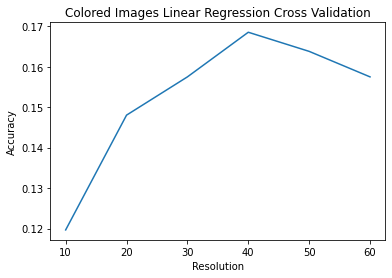

In [ ]:
import matplotlib.pyplot as plt

AccuracyList = []
for i in kAccuracyDictionary_Color.values():
  AccuracyList.append(i)
# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(kAccuracyDictionary_Color.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(kAccuracyDictionary_Color.items())])
plt.title('Colored Images Linear Regression Cross Validation')
plt.xlabel('Resolution')
plt.ylabel('Accuracy')
plt.plot(OptionsResolution,AccuracyList)
bestResolution_Color=max(kAccuracyDictionary_Color, key=kAccuracyDictionary_Color.get)

print("Best resolution found is: ",bestResolution_Color)

In [ ]:
classifierColor = LinearClassifier()
for idx, val in enumerate(OptionsResolution):
  if val == bestResolution_Color:
    classifierColor.train(TrainDataColorList[idx], TrainLabelsColorList[idx])
    ColorPrediciton = classifierColor.predict(TestDataColorList[idx])
    print("For Color Images:")
    print("CCR 1 (Roses): ",np.sum(ColorPrediciton[0:100] == TestLabelsColorList[idx][0:100])/100)
    print("CCR 2 (Sunflowers): ",np.sum(ColorPrediciton[100:200] == TestLabelsColorList[idx][100:200])/100)
    print("CCR 3 (Tulips):",np.sum(ColorPrediciton[200:300] == TestLabelsColorList[idx][200:300])/100)
    print("CCR 4 (Daisy): ",np.sum(ColorPrediciton[300:400] == TestLabelsColorList[idx][300:400])/100)
    print("CCR 5 (Dandelion): ",np.sum(ColorPrediciton[400:500] == TestLabelsColorList[idx][400:500])/100)
    print("ACCR: ",np.sum(ColorPrediciton== TestLabelsColorList[idx])/500)

(4800, 5)
iteration 0 / 300: loss 1.609195
iteration 100 / 300: loss 1.509092
iteration 200 / 300: loss 1.466463
For Color Images:
CCR 1 (Roses):  0.22
CCR 2 (Sunflowers):  0.37
CCR 3 (Tulips): 0.44
CCR 4 (Daisy):  0.55
CCR 5 (Dandelion):  0.58
ACCR:  0.432


In [ ]:
# Cross Fold Validation Gray ------------------------------------------------------------
kAccuracyDictionary_Gray = {}
for idx, val in enumerate(OptionsResolution):
  AccuracyList = CrossFoldValidation(ValidationCounter,OptionsResolution,TrainDataGrayList[idx],TrainLabelsGrayList[idx])
  kAccuracyDictionary_Gray[val] = max(AccuracyList)

In [ ]:
# Gray Images Loading ------------------------------------------------------------
try:
   del TrainDataGrayList, TrainLabelsGrayList
   del TestDataGrayList, TestLabelsGrayList
   print('Clear previously loaded data.')
except:
   pass

TrainDataGrayList,TrainLabelsGrayList = Load(datadir,Folders,ImageNamesTrain,"Gray")
TestDataGrayList,TestLabelsGrayList = Load(datadir,Folders,ImageNamesTest,"Gray")


In [ ]:
for idx, val in enumerate(OptionsResolution):
  print("For Resolution ",val,"x",val,": ")
  print("Gray Training data shape: ",TrainDataGrayList[idx].shape," and Test data shape: ",TrainLabelsGrayList[idx].shape)
  print("Gray Training data shape: ",TestDataGrayList[idx].shape," and Test data shape: ",TestLabelsGrayList[idx].shape)


For Resolution  10 x 10 : 
Gray Training data shape:  (3177, 10, 10)  and Test data shape:  (3177,)
Gray Training data shape:  (500, 10, 10)  and Test data shape:  (500,)
For Resolution  20 x 20 : 
Gray Training data shape:  (3177, 20, 20)  and Test data shape:  (3177,)
Gray Training data shape:  (500, 20, 20)  and Test data shape:  (500,)
For Resolution  30 x 30 : 
Gray Training data shape:  (3177, 30, 30)  and Test data shape:  (3177,)
Gray Training data shape:  (500, 30, 30)  and Test data shape:  (500,)
For Resolution  40 x 40 : 
Gray Training data shape:  (3177, 40, 40)  and Test data shape:  (3177,)
Gray Training data shape:  (500, 40, 40)  and Test data shape:  (500,)
For Resolution  50 x 50 : 
Gray Training data shape:  (3177, 50, 50)  and Test data shape:  (3177,)
Gray Training data shape:  (500, 50, 50)  and Test data shape:  (500,)
For Resolution  60 x 60 : 
Gray Training data shape:  (3177, 60, 60)  and Test data shape:  (3177,)
Gray Training data shape:  (500, 60, 60)  and

In [ ]:
# Verifying shape of data
for idx, val in enumerate(OptionsResolution):
  print("For Resolution ",val,"x",val,": ")
  TrainDataGrayList[idx] = np.reshape(TrainDataGrayList[idx], (TrainDataGrayList[idx].shape[0], -1))
  TestDataGrayList[idx] = np.reshape(TestDataGrayList[idx], (TestDataGrayList[idx].shape[0], -1))
  print ("Gray Train Data New Shape: ",TrainDataGrayList[idx].shape)
  print ("Gray Test Data New Shape: ",TestDataGrayList[idx].shape)

For Resolution  10 x 10 : 
Gray Train Data New Shape:  (3177, 100)
Gray Test Data New Shape:  (500, 100)
For Resolution  20 x 20 : 
Gray Train Data New Shape:  (3177, 400)
Gray Test Data New Shape:  (500, 400)
For Resolution  30 x 30 : 
Gray Train Data New Shape:  (3177, 900)
Gray Test Data New Shape:  (500, 900)
For Resolution  40 x 40 : 
Gray Train Data New Shape:  (3177, 1600)
Gray Test Data New Shape:  (500, 1600)
For Resolution  50 x 50 : 
Gray Train Data New Shape:  (3177, 2500)
Gray Test Data New Shape:  (500, 2500)
For Resolution  60 x 60 : 
Gray Train Data New Shape:  (3177, 3600)
Gray Test Data New Shape:  (500, 3600)


In [ ]:
import matplotlib.pyplot as plt

AccuracyList = []
for i in kAccuracyDictionary_Gray.values():
  AccuracyList.append(i)
# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(kAccuracyDictionary_Gray.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(kAccuracyDictionary_Gray.items())])
plt.title('Colored Images Linear Regression Cross Validation')
plt.xlabel('Resolution')
plt.ylabel('Accuracy')
plt.plot(OptionsResolution,AccuracyList)
bestResolution_Gray=max(kAccuracyDictionary_Gray, key=kAccuracyDictionary_Gray.get)

print("Best resolution found is: ",bestResolution_Gray)

In [ ]:
classifierGray = LinearClassifier()
for idx, val in enumerate(OptionsResolution):
  if val == bestResolution_Gray:
    classifierGray.train(TrainDataGrayList[idx], TrainLabelsGrayList[idx])
    GrayPrediciton = classifierGray.predict(TestDataGrayList[idx])
    print("For Gray Images:")
    print("CCR 1 (Roses): ",np.sum(GrayPrediciton[0:100] == TestLabelsGrayList[idx][0:100])/100)
    print("CCR 2 (Sunflowers): ",np.sum(GrayPrediciton[100:200] == TestLabelsGrayList[idx][100:200])/100)
    print("CCR 3 (Tulips):",np.sum(GrayPrediciton[200:300] == TestLabelsGrayList[idx][200:300])/100)
    print("CCR 4 (Daisy): ",np.sum(GrayPrediciton[300:400] == TestLabelsGrayList[idx][300:400])/100)
    print("CCR 5 (Dandelion): ",np.sum(GrayPrediciton[400:500] == TestLabelsGrayList[idx][400:500])/100)
    print("ACCR: ",np.sum(GrayPrediciton== TestLabelsGrayList[idx])/500)


(1600, 5)
iteration 0 / 300: loss 1.609433
iteration 100 / 300: loss 1.572257
iteration 200 / 300: loss 1.550869
For Gray Images:
CCR 1 (Roses):  0.07
CCR 2 (Sunflowers):  0.33
CCR 3 (Tulips): 0.04
CCR 4 (Daisy):  0.46
CCR 5 (Dandelion):  0.61
ACCR:  0.302
